# <span style="color:#000080"> Social Advertising Algorithm - Finding Potential Users </span>

<br>

***LIU Wenzhuo, SUN Wang, ZHANG Bolong, ZHANG Shangyuan***

[M2 DataScience](https://datascience-x-master-paris-saclay.fr/) - [Université ParisScalay](https://www.universite-paris-saclay.fr)

---
## <span style="color:#000080"> Table of Contents </span>
### 1. Background
### 2. Task description
### 3. Data description
- 3.1 Data files
- 3.2 Data desensitisation
- 3.3 User Feature Description
- 3.4 Ad Feature Description

### 4. Exploratory data analysis and visualization
### 5. model (liu)
### 6. Evaluation
### 7. submission (liu)

## <span style="color:#000080"> 1. Background </span>

Social relationship-based advertising (i.e., social advertising) has become one of the fastest growing categories of advertising in the Internet advertising industry.

Tencent Social Ads is the advertising arm of Chinese internet giant Tencent. Through the platform, it’s possible for clients to target users on Wechat (also known as Weixin), QQ and QZone, and other Tencent platforms. Advertisers claim to reach around 900 million users through Tencent in 2017.

This challenge comes from a real advertising product in Tencent's social advertising business - Lookalike. The purpose of this product is to identify other users who are similar to the target users from a large number of people based on the target data provided by the advertiser. In the actual case, Lookalike can help advertisers find potential consumers similar to existing consumers based on the existing data of advertisers, which finally helps to explore new customers and expand their business.

![](img/tencent.png)

## <span style="color:#000080"> 2. Task description </span>

Lookalike automatically calculates a similar population (called an extended population) based on a seed population (also known as a seed package) provided by the advertiser.
We will provide you with hundreds of seed populations, user features of a large number of candidate groups, and the advertisement features of the seed population. For the sake of business data security assurance, all data is desensitized data.

The entire data set is divided into training set and test set. The training set calibrates the users who belong to the seed package and the users who do not (i.e., positive and negative samples). The test set will detect if your algorithm can accurately classify the users into corresponding seed package in the test set. The seed packages in the training set and the test set are identical.

In order to test whether your algorithm can well understand the user and the seed population, you are required to provide the scores of candidate users belonging to each seed package in the test set (the higher the score, the more likely the candidate is a potential user of a package). For details, please refer to **[Evaluation]**


## <span style="color:#000080"> 3. Data description </span>

### <span style="color:#000080"> 3.1 Data files </span>

#### _Data source_

The time range for the data (after desensitization) given by [Tencent](https://www.tencent.com/en-us/) is 30 consecutive days. In general, the data is divided into four files: a training set, a test set, a user dataset and an advertisement dataset.

**[train.csv](https://drive.google.com/open?id=1JS5hIgYAkEF4SkRbP_MVTKTxJgytmlQW)** <br>
Each row represents a training sample, separated by commas, in the format: "aid, uid, label". Among them, aid uniquely identifies an ad, and uid uniquely identifies a user. The value of the sample label is +1 or -1, where +1 is the seed user and -1 is the non-seed user. To simplify the problem, a seed package only corresponds to one ad aid, and the two are one-to-one correspondence.

**[test.csv](https://drive.google.com/open?id=1j5FzFyx_vGO0t0W5Jq92i_ZZmuG5U1kS)** <br>
Each row represents a test sample, separated by commas, in the format: "aid, uid". The field meaning is the same as the training set.

**[test_truth.csv](https://drive.google.com/open?id=1LXxm_Qg8_wkuVCIlJmORtRTXgAHiZq-y)** <br>
Test set with label.

**[userFeature.data](https://drive.google.com/open?id=1e0vc3mDqSB1yrWpvYxHdyflSZEaI9YFt)** <br>
Each row represents a user's feature data in the format: “uid|features”, and uid and features are separated by a vertical bar “|”. The feature is in [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit) format: "feature_group1|feature_group2|feature_group3|...". Each feature_group represents a feature group, and multiple feature groups are also separated by vertical bar "|". If a feature group includes multiple values, it is separated by spaces. The format is: "feature_group_name fea_name1 fea_name2 ...", where fea_name is in the format of data number. For details of user feature, see **[User Feature Description]**

**[adFeature.csv](https://drive.google.com/open?id=1ife4Kh4x6Q9Uc4odGDaL6A35aNbFV8yi)** <br>
The format is: "aid, advertiserId, campaignId, creativeId, creativeSize, adCategoryId, productId, productType". Among them, aid uniquely identifies an advertisement, and the remaining fields are advertisement features, and the fields are separated by commas. For details of the ad feature, see **[Ad Feature Description]**.

#### _Pre-processing_
Since the original data is really large, considering PC performance, we randomly sampled a portion of the data and only retained the useful parts of the user feature and ad feature. For details, please refer to our code `utils.py`.

#### _Download data_
You may first download [original data file](https://drive.google.com/open?id=1ToCFvRCfxReePNJ-Kv0ZGLPh7xBRjpXP) (do not rename the folder and files) and run `prepare_sample.sh` to redo the above process, but that still takes about 20 mins in PC. So we have provided processed data, **you can just run `!sh download_sample.sh` in your notebook to download the data directly.**

Then, you will get new trainning set and test set by calling `get_train_data` and `get_test_data` in `problem.py`, we will give a demonstration in section **[Model]**

### <span style="color:#000080"> 3.2 Data desensitisation </span>

For data security reasons, uid, aid, user feature and advertisement feature are encrypted as follows:

**• uid**: Randomize the user ID and generate a non-repeating encrypted uid from 1 to N, where N is the total number of users (assuming the number of users is 100, all users are randomly scattered, and their serial numbers are used as uid , the value range is [1, 100]);

**• aid**: Generate an encrypted aid referring to the encryption method of uid;

**• user feature**: Generate the encrypted fea_name referring to the encryption method of uid;

**• ad feature**: Generate encrypted fields referring to the encryption method of uid


### <span style="color:#000080"> 3.3 User Feature Description </span>

User features include the following feature groups (feature_group_name), where we take 0 if the feature values are unknown:

• Age **(age)**: Segmentation, each serial number represents an age segment

• Gender **(gender)**: Male / Female

• Marriage status **(marriageStatus)**: Single/Married status (multiple status can coexist)

• Education **(education)**: PhD/Master/Bachelor/High School/Junior/Primary School

• Consumption ability **(consumptionAbility)**: High / Low

• Geographic location **(LBS)**: Each serial number represents a geographic location

• Interest category **(interest)**: Five feature groups mined from different data sources, denoted by interest1, interest2, interest3, interest4, interest5, each interest feature group contains several interest IDs

• Keyword **(keyword)**: User’s detailed preferences comparing to interest category. The three feature groups mined from different data sources are represented by kw1, kw2, kw3, and each keyword feature group contains several keywords the user interested in

• Topic **(topic)**: User’s preferences mined using LDA. The three feature groups mined from different data sources are represented by topic1, topic2, topic3

• APP recent installation behavior **(appIdInstall)**: APP installed within 63 days, each APP is represented by a unique ID

• Active APP **(appIdAction)**: Active APP used by the user

• Internet connection type **(ct)**: WIFI/2G/3G/4G

• Operating system **(os)**: Android/IOS, regardless of version number

• Mobile operator **(carrier)**: Mobile operator, Mobile / Unicom / Telecom / Other

• House property **(house)**: Owning a house property or not

### <span style="color:#000080"> 3.4 Ad Feature Description </span>

• Ad ID **(aid)**: Advertisement refers to the advertising creative and advertising display related settings created by the advertiser, including the basic information of an advertisement (name, delivery time, etc.), promotion target, delivery platform, specification, creative, bid, etc.

• Advertiser ID **(advertiserId)**: The account structure has four levels: account – campaign plan - advertisement - creative, account and advertiser are one-to-one correspondence

• Campaign plan ID **(campaignId)**: The campaign plan is a collection of advertisements (similar to a folder). Advertisers can place advertisements with the same conditions such as platform and budget in the same campaign plan for easy management

• Creative ID **(creativeId)**: the content of the ad shown to the user. There can be multiple sets of creative under one ad.

• Creative size **(creativeSize)**: the ceative size ID, which identifies the creative size

• Ad category **(adCategoryId)**: the ad category ID, defined by ad classification system

• Product ID **(productId)**: the promoted product ID, identified by the product id in the system

• Product type **(productType)**: the type of product corresponding to the ad delivery target (e.g. JD.com - merchandise, app - download)

## <span style="color:#000080"> 4. Exploratory data analysis and visualization </span>
### <span style="color:#000080"> Import  library </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

### <span style="color:#000080"> Load data </span>

In [2]:
# if not download before
!sh download.sh

In [3]:
train = pd.read_csv("data/train.csv")
adFeature = pd.read_csv("data/adFeature.csv")
userFeature = pd.read_csv("data/userFeature.csv")

**Firstly, we analyse the composition of training data**

In [4]:
train.head()

,aid,uid,label
0,311,36722734,0
1,1201,35790079,0
2,311,42796542,0
3,529,14839509,0
4,681,69618097,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923875 entries, 0 to 923874
Data columns (total 3 columns):
aid      923875 non-null int64
uid      923875 non-null int64
label    923875 non-null int64
dtypes: int64(3)
memory usage: 21.1 MB


In [6]:
print("The number of users in training data is %d \nThe number of advertisements in training data is %d" 
      % (len(train['uid'].unique()), len(train['aid'].unique())))

The number of users in training data is 911216 
The number of advertisements in training data is 173


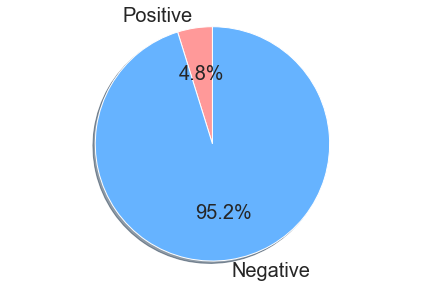

In [7]:
# Pie chart
labels = ['Positive', 'Negative']
sizes = [train["label"].value_counts()[1]/len(train) , train["label"].value_counts()[0]/len(train)]
explode = (0, 0)

#add colors
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',textprops={'fontsize': 20},
        shadow=True, startangle=90)

ax1.axis('equal')
plt.tight_layout()
plt.show()

<div class="alert alert-success">
We can find that those training data are highly unbalanced as a binary classification
</div>

**Secondly, we analyse the composition of advertisement features**

In [8]:
adFeature.head()

,aid,advertiserId,campaignId,creativeId,creativeSize,adCategoryId,productId,productType
0,2169,16770,38402,43877,35,89,9760,9
1,411,9106,163120,220179,79,21,0,4
2,894,452,38391,43862,35,10,12193,11
3,450,45705,352827,565415,42,67,0,4
4,313,243,531344,979528,22,27,113,9


In [9]:
adFeature.dtypes

aid             int64
advertiserId    int64
campaignId      int64
creativeId      int64
creativeSize    int64
adCategoryId    int64
productId       int64
productType     int64
dtype: object

We can analyse the distribution of advertisement catagory and product type.

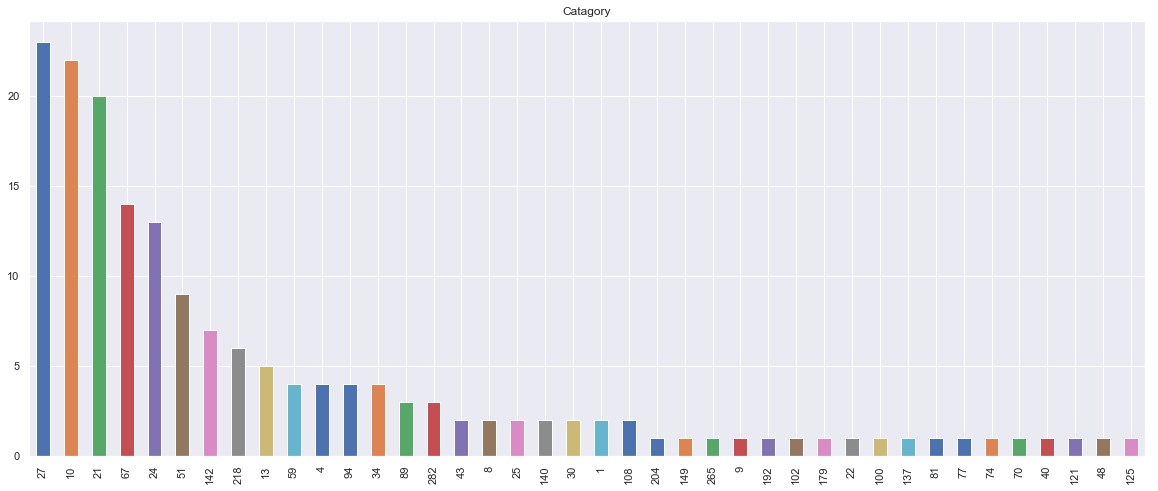

In [10]:
adFeature['adCategoryId'].value_counts().plot.bar(figsize=(20,8),title="Catagory")

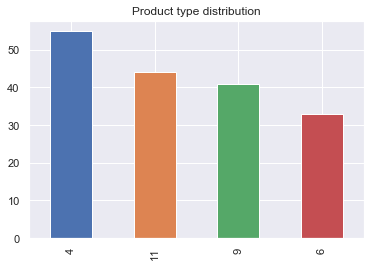

In [11]:
adFeature['productType'].value_counts().plot.bar(title="Product type distribution")

We can also show the corelation of some features

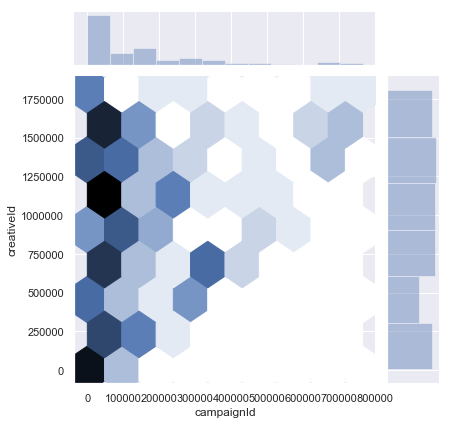

In [12]:
sns.jointplot(x='campaignId', y='creativeId', data=adFeature, kind='hex', gridsize=8)

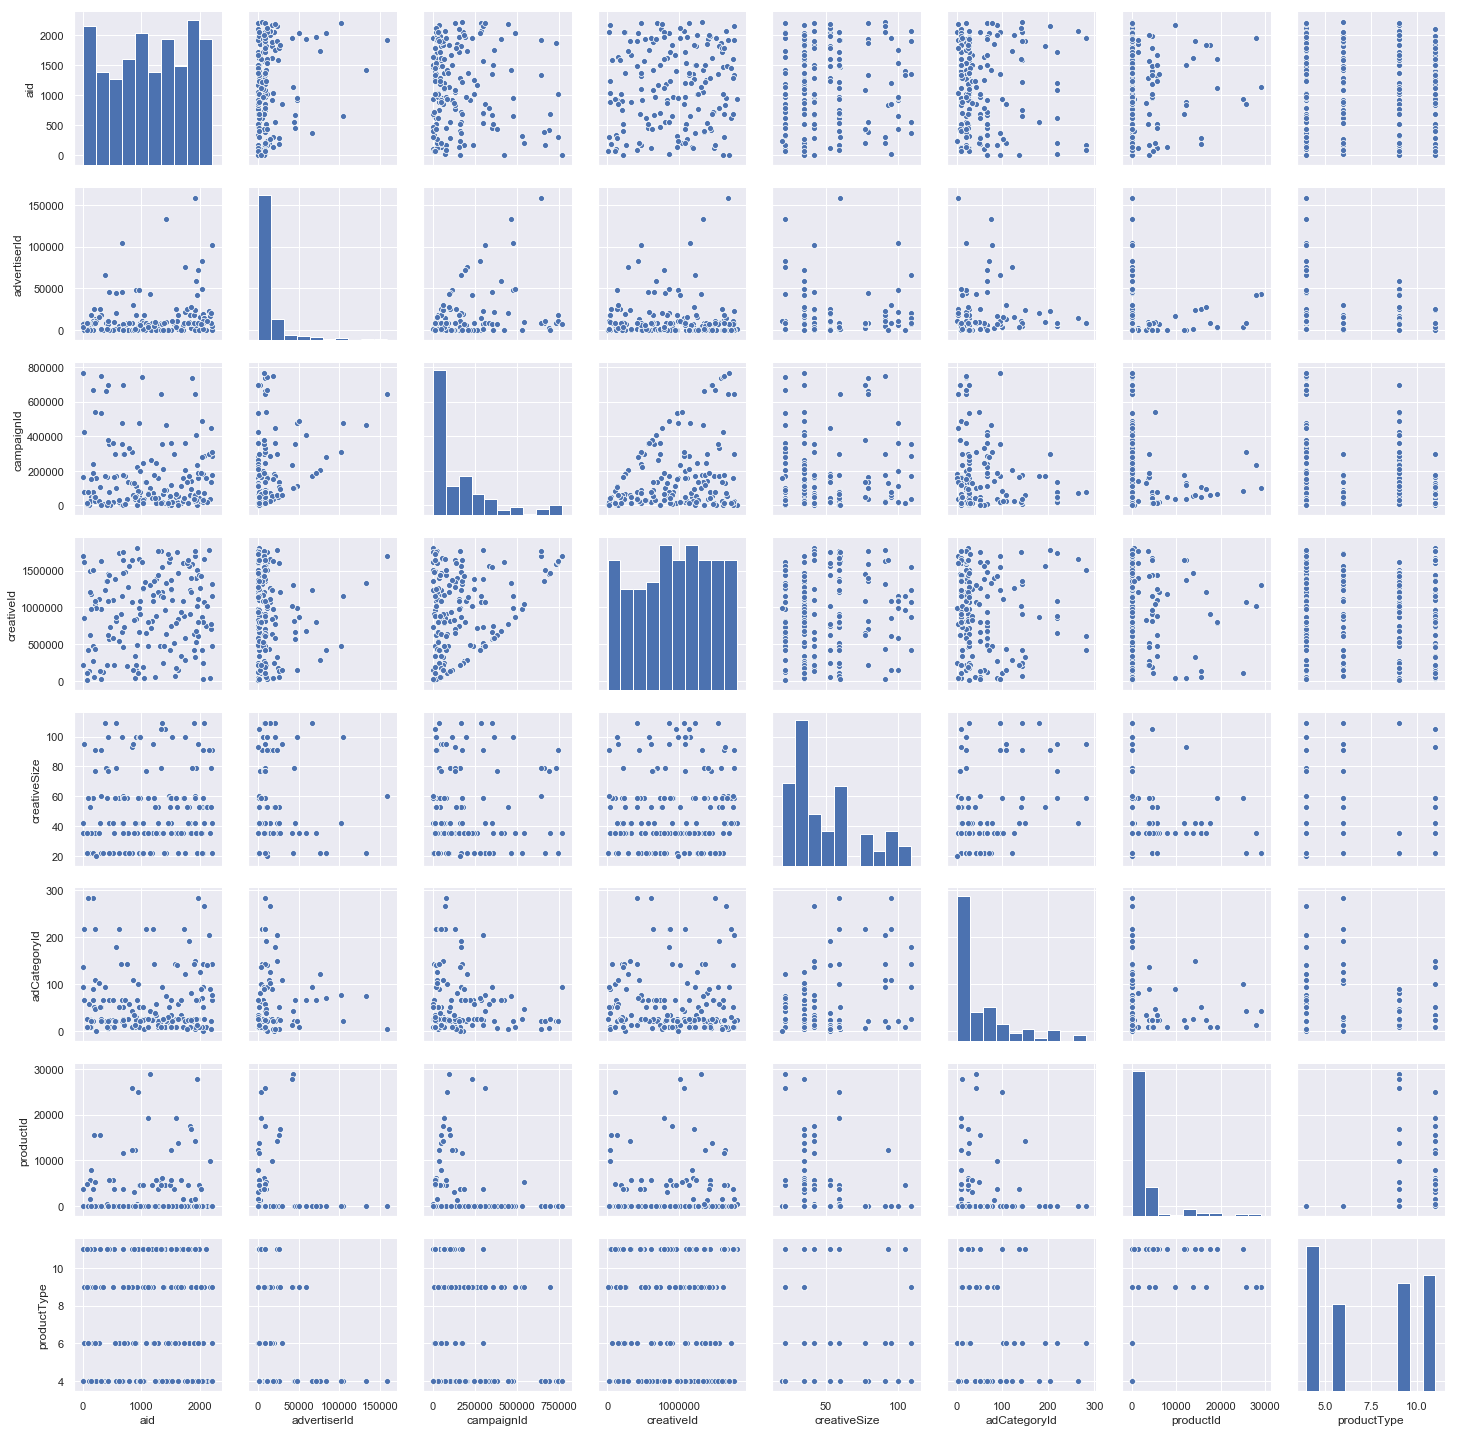

In [13]:
sns.pairplot(adFeature)

**Finally, we analyse the composition of user features**

In [14]:
userFeature.head(3)

,uid,age,gender,marriageStatus,education,consumptionAbility,LBS,interest1,interest2,interest3,...,kw3,topic1,topic2,topic3,appIdInstall,appIdAction,ct,os,carrier,house
0,33510376,1,2,10,7,1,795.0,NaN,NaN,NaN,...,NaN,NaN,5169 8402 9808 4812 105,NaN,NaN,NaN,3,2 1,1,NaN
1,59063212,3,1,11,2,2,932.0,93 70 77 109 100 48 39 46 36 11,47 24 20 30,NaN,...,NaN,8553 1042 8747 523 9826,9815 7593 7956 8813 9275,NaN,NaN,NaN,3 1,1,0,NaN
2,9603408,1,2,10,2,2,280.0,70 86 76 69 28 59 49 122 6 2 42 73 26 35 116 3...,73 31 1 46 70 3 74 44 37 29,NaN,...,NaN,9826 6058 8003 9927 7684,218 3545 8883 986 4994,NaN,NaN,NaN,3 1,2,1,NaN


In [15]:
userFeature.dtypes

uid                     int64
age                     int64
gender                  int64
marriageStatus         object
education               int64
consumptionAbility      int64
LBS                   float64
interest1              object
interest2              object
interest3              object
interest4              object
interest5              object
kw1                    object
kw2                    object
kw3                    object
topic1                 object
topic2                 object
topic3                 object
appIdInstall           object
appIdAction            object
ct                     object
os                     object
carrier                 int64
house                 float64
dtype: object

<div class="alert alert-warning">
We can find that there exists a lot of "object" data type which should be better presented.
</div>

In [16]:
def objet_to_listNum(df):
    columns = df.columns
    for i in columns:
        if df[i].dtype == 'object':
            df[i] = df[i].str.split(' ')
    
    return df

userFeature = objet_to_listNum(userFeature)

Now we present some distributions of features

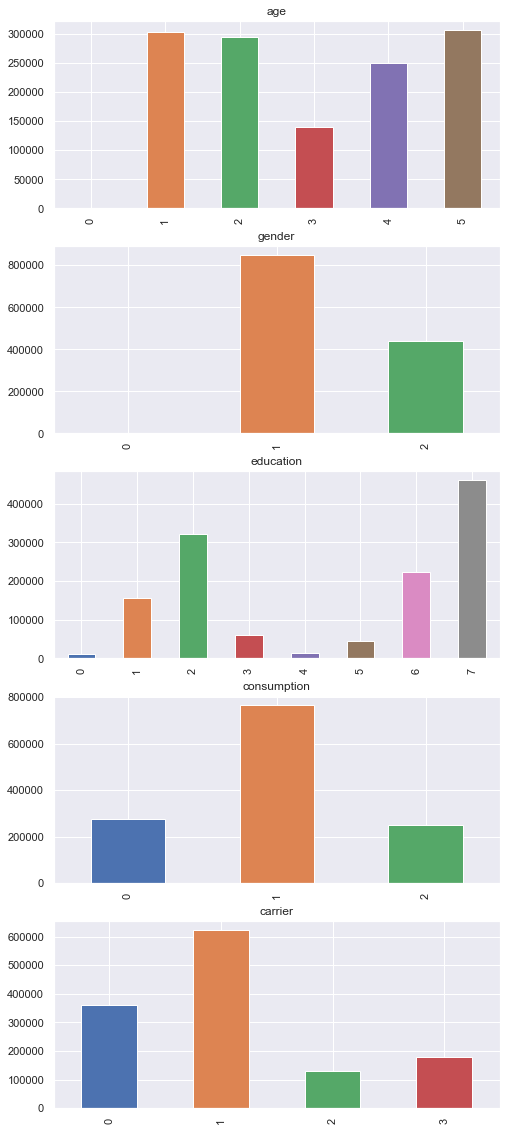

In [17]:
fig,axes = plt.subplots(nrows=5,ncols=1,figsize=(8,20))

userFeature['age'].value_counts(sort=False).plot(ax=axes[0],kind='bar',title="age")
userFeature['gender'].value_counts(sort=False).plot(ax=axes[1],kind='bar',title='gender')
userFeature['education'].value_counts(sort=False).plot(ax=axes[2],kind='bar',title='education')
userFeature['consumptionAbility'].value_counts(sort=False).plot(ax=axes[3],kind='bar',title='consumption')
userFeature['carrier'].value_counts(sort=False).plot(ax=axes[4],kind='bar',title="carrier")

We can calculate the missing data in this data set

In [18]:
missing_userF = (userFeature.isnull()/len(userFeature)).sum()
missing_userF = missing_userF.sort_values(ascending=False)

In [19]:
print("Percentage of missing value for each feature:\n-----------\n")
for i,j in zip(missing_userF.index,missing_userF.values):
    print(i," "* (20-len(i)),"%.2f"%j)

Percentage of missing value for each feature:
-----------

interest4             0.98
appIdAction           0.98
appIdInstall          0.98
interest3             0.97
kw3                   0.95
topic3                0.95
house                 0.82
interest2             0.34
interest5             0.25
kw1                   0.10
interest1             0.09
topic1                0.08
topic2                0.04
kw2                   0.03
LBS                   0.00
carrier               0.00
ct                    0.00
os                    0.00
consumptionAbility    0.00
education             0.00
marriageStatus        0.00
gender                0.00
age                   0.00
uid                   0.00


<div class="alert alert-warning">
We can find that there exists a lot of missing values for us to deal with.
</div>

We can also show the distribution of one feature in each catagory of another feature to deduce potential relation.

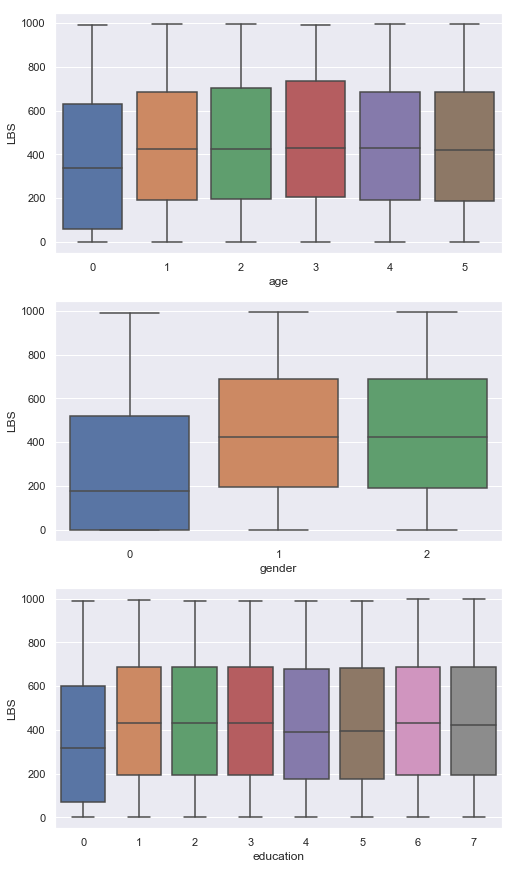

In [20]:
fig,axes = plt.subplots(nrows=3,ncols=1,figsize=(8,15))
sns.boxplot(x="age",y="LBS",ax=axes[0],data=userFeature)
sns.boxplot(x="gender",y="LBS",ax=axes[1],data=userFeature)
sns.boxplot(x="education",y="LBS",ax=axes[2],data=userFeature)

plt.show()

We can see a lot of valuable information about the dataset, and use it for further feature engineering.

## <span style="color:#000080"> 6. Evaluation </span>

For this binary classification, we can use several metrics frequently used. With the prediction of model, we can first compute a confusion matrix.

|                      |Actual positive|Actual negative|
|----------------------|---------------|---------------|
|**Predicted positive**|True Positive (**TP**)|False Positive (**FP**)|
|**Predicted negative**|False Negative (**FN**)|True Negative (**TN**)|

Precision is the proportion of positive predictions that are correct while recall is the proportion of truth that correctly predicted as truth. They can be calculated with the following equations:

$$
\begin{align*}
    Precision = \frac{TP}{TP+FP} \\
    Recall = \frac{TP}{TP+FN}
\end{align*}
$$

Then we can compute **F1 score** with equation: 

$$f1 = \frac{2 * Precision * Recall}{Precision + Recall}$$
    
We can even compute f1 score for both two labels and compute their average weighted by their number of instances, which is denoted as **W_FScore** in our code.

Apart from that, we can calculate the True Positive Rate (TPR) and the False Positive Rate (FPR) with the following equations:

$$
\begin{align*}
    TPR = \frac{TP}{TP+FN} \\
    FPR = \frac{FP}{TP+FP}
\end{align*}
$$

Then we can draw a Receiver Operating Characteristic (ROC) curve and compute the area under the curve (**AUC**) as a metric.

Finally, we can use **Accuracy**, **Mean Absolute Error** and **Negative Log Likelihood** as additional metrics for a help.

## <span style="color:#000080"> 7. Submission </span>

## <span style="color:#000080"> 8. Hints </span>

#### _use all data_
If you want to use more data to augment your model's performance, you can run `prepare_all.sh` to process all user features with [original data file](https://drive.google.com/open?id=1ToCFvRCfxReePNJ-Kv0ZGLPh7xBRjpXP) (do not rename the folder and files) downloaded. 